In [19]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
df_cleaned = pd.read_csv('df_cleaned.csv')

In [20]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

dic_dev = {"Developing": 1, "Developed": 0}

df_cleaned['status_encoded'] = df_cleaned['status'].map(dic_dev)

In [59]:
# df_cleaned2 = df_cleaned.drop(columns = ['status'])
df_cleaned2 = df_cleaned[['morte_HIV_4anos', 'composicao_recursos_renda', 'mortalidade_adulta', 'escolaridade', "IMC", 'expectativa_vida', 'pais', 'mortalidade_5anos', 'vacina_poliomelite_crianca']]

In [60]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error

In [61]:
# Suponha que seu DataFrame se chama df_cleaned2 e a variável alvo é 'target'
X = df_cleaned2.drop(columns=['expectativa_vida'])
y = df_cleaned2['expectativa_vida']

# Divisão inicial: treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [62]:
from sklearn.model_selection import train_test_split

# Suponha que o DataFrame tenha uma coluna chamada 'pais'
# Agrupar por países para evitar vazamento
paises = df_cleaned2['pais'].unique()

# Divisão de países em treino e teste (80% treino, 20% teste)
paises_train, paises_test = train_test_split(paises, test_size=0.2, random_state=42)

# Separar os conjuntos com base na divisão dos países
train_mask = df_cleaned2['pais'].isin(paises_train)
test_mask = df_cleaned2['pais'].isin(paises_test)

X_train = X[train_mask]
y_train = y[train_mask]

X_test = X[test_mask]
y_test = y[test_mask]


In [63]:
X_train.drop(columns=['pais'], inplace=True)
X_test.drop(columns=['pais'], inplace=True)

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# K-Fold para validação cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Para armazenar as métricas de cada fold
fold_metrics_mse = []
fold_metrics_mae = []

# Iterar pelos folds
for train_index, val_index in kf.split(X_train):
    # Divisão dos dados em treino e validação
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # Escalando os dados com MinMaxScaler
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train_fold)  # Ajusta e transforma o conjunto de treino
    X_val_scaled = scaler.transform(X_val_fold)         # Transforma o conjunto de validação (sem ajustar novamente)
    
    # Modelo de Regressão Linear
    model = LinearRegression()
    model.fit(X_train_scaled, y_train_fold)
    
    # Previsões na validação
    y_val_pred = model.predict(X_val_scaled)
    
    # Métrica de erro
    fold_mse = mean_squared_error(y_val_fold, y_val_pred)
    fold_mae = mean_absolute_error(y_val_fold, y_val_pred)
    fold_metrics_mse.append(fold_mse)
    fold_metrics_mae.append(fold_mae)

# Média dos MSEs nos folds
mean_mse = np.mean(fold_metrics_mse)
mean_mae = np.mean(fold_metrics_mae)

# Ajustando nos dados de treino completos e testando no conjunto de teste
scaler = MinMaxScaler()
X_train_scaled_full = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo final
model = LinearRegression()
model.fit(X_train_scaled_full, y_train)

# Previsões no conjunto de teste
y_test_pred = model.predict(X_test_scaled)

# Métrica de erro no conjunto de teste
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print(f"MSE Médio (Validação Cruzada): {mean_mse:.4f}")
print(f"MSE no Conjunto de Teste: {test_mse:.4f}")

print(f"MAE Médio (Validação Cruzada): {mean_mae:.4f}")
print(f"MAE no Conjunto de Teste: {test_mae:.4f}")


MSE Médio (Validação Cruzada): 14.2891
MSE no Conjunto de Teste: 10.5526
MAE Médio (Validação Cruzada): 2.7962
MAE no Conjunto de Teste: 2.4303


In [ ]:
MSE Médio (Validação Cruzada): 12.8598
MSE no Conjunto de Teste: 10.6737
MAE Médio (Validação Cruzada): 2.6791
MAE no Conjunto de Teste: 2.5411

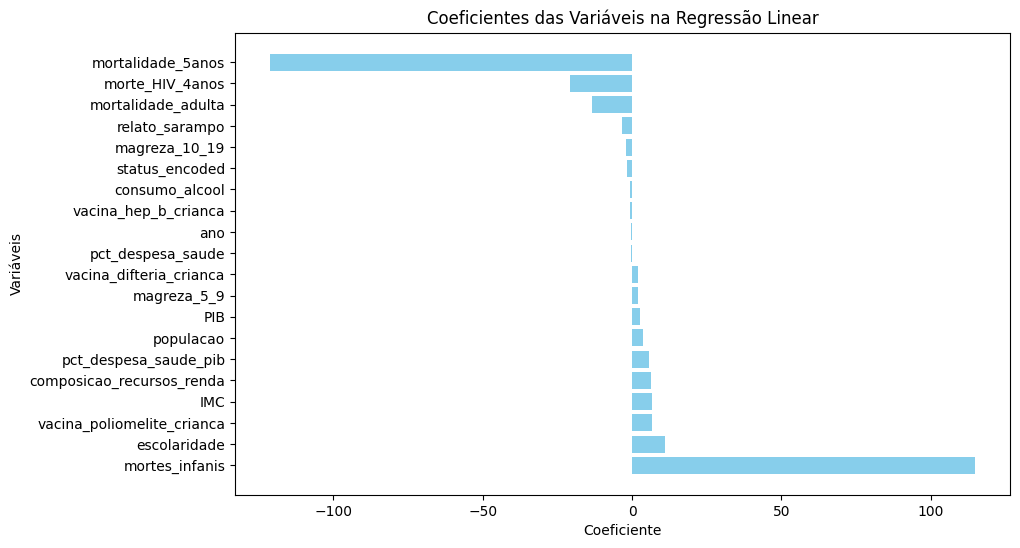

Intercepto: 54.05082211758885


In [31]:
import matplotlib.pyplot as plt

# Obtendo os coeficientes e intercepto
coef = model.coef_  # Coeficientes das variáveis
intercept = model.intercept_  # Intercepto (constante)

# Criando um DataFrame para os coeficientes com os nomes das variáveis
coef_df = pd.DataFrame(coef, index=X_train.columns, columns=['Coeficiente'])

# Ordenando os coeficientes por valor absoluto (para facilitar a visualização)
coef_df = coef_df.sort_values(by='Coeficiente', ascending=False)

# Plotando os coeficientes
plt.figure(figsize=(10, 6))
plt.barh(coef_df.index, coef_df['Coeficiente'], color='skyblue')
plt.xlabel('Coeficiente')
plt.ylabel('Variáveis')
plt.title('Coeficientes das Variáveis na Regressão Linear')
plt.show()

# Exibindo também o intercepto
print(f"Intercepto: {intercept}")